In [98]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.metrics import recall_score
from scipy import stats 
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import warnings

import itertools

from imblearn.over_sampling import SMOTE

%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense,Reshape
from keras.layers import Conv2D as Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Activation
import  keras
from keras.callbacks import ModelCheckpoint
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn import linear_model
from sklearn import neighbors
from sklearn.ensemble import AdaBoostClassifier
import pickle
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import f1_score,accuracy_score,classification_report,roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import GridSearchCV


In [2]:
loan_data_backup = pd.read_csv('loan_data_2007_2014.csv')

In [52]:
loan_data_backup.shape

(466285, 75)

In [3]:
loan_data = loan_data_backup.copy()

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.utils import shuffle


In [149]:
loan_data.head()

,loan_amnt,int_rate,annual_inc,emp_length_int,term_int,mths_since_issue_d,loan_active_mths,prepaid_status,good_bad,grade_enc,mths_sice_last_pymnt_d,home_ownership_enc,purpose_enc
0,5000,10.65,24000.0,10,36,72.0,37.0,0,1,1,35.0,5,1
1,2500,15.27,30000.0,0,60,72.0,16.0,0,0,2,56.0,5,0
2,2400,15.96,12252.0,10,36,72.0,30.0,1,1,2,42.0,5,11
3,10000,13.49,49200.0,10,36,72.0,37.0,0,1,2,35.0,5,9
4,3000,12.69,80000.0,1,60,72.0,49.0,0,1,1,23.0,5,9


In [7]:
loan_data = loan_data[['loan_amnt','term', 'int_rate','grade','emp_length','home_ownership', 'annual_inc','purpose','loan_status','issue_d','last_pymnt_d']]

In [8]:
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year', str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('n/a',  str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' year', '')

In [10]:
loan_data.drop('emp_length', axis = 1, inplace=True)

In [11]:
loan_data.head()

,loan_amnt,term,int_rate,grade,home_ownership,annual_inc,purpose,loan_status,issue_d,last_pymnt_d,emp_length_int
0,5000,36 months,10.65,B,RENT,24000.0,credit_card,Fully Paid,Dec-11,Jan-15,10
1,2500,60 months,15.27,C,RENT,30000.0,car,Charged Off,Dec-11,Apr-13,0
2,2400,36 months,15.96,C,RENT,12252.0,small_business,Fully Paid,Dec-11,Jun-14,10
3,10000,36 months,13.49,C,RENT,49200.0,other,Fully Paid,Dec-11,Jan-15,10
4,3000,60 months,12.69,B,RENT,80000.0,other,Current,Dec-11,Jan-16,1


In [12]:
loan_data['term_int'] = pd.to_numeric(loan_data['term'].str.replace(' months', '')) 

In [14]:
loan_data.drop('term', axis = 1, inplace=True)

In [15]:
loan_data.head()

,loan_amnt,int_rate,grade,home_ownership,annual_inc,purpose,loan_status,issue_d,last_pymnt_d,emp_length_int,term_int
0,5000,10.65,B,RENT,24000.0,credit_card,Fully Paid,Dec-11,Jan-15,10,36
1,2500,15.27,C,RENT,30000.0,car,Charged Off,Dec-11,Apr-13,0,60
2,2400,15.96,C,RENT,12252.0,small_business,Fully Paid,Dec-11,Jun-14,10,36
3,10000,13.49,C,RENT,49200.0,other,Fully Paid,Dec-11,Jan-15,10,36
4,3000,12.69,B,RENT,80000.0,other,Current,Dec-11,Jan-16,1,60


In [16]:
# Assume we are now in December 2017
loan_data['issue_d_date'] = pd.to_datetime(loan_data['issue_d'], format = '%b-%y')
# Extracts the date and the time from a string variable that is in a given format.
loan_data['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['issue_d_date']) / np.timedelta64(1, 'M')))

In [17]:
loan_data['last_pymnt_d_date']= pd.to_datetime(loan_data['last_pymnt_d'],format='%b-%y')
loan_data['loan_active_mths'] =round(pd.to_numeric((loan_data['last_pymnt_d_date']- loan_data['issue_d_date'])/np.timedelta64(1,'M')))

In [28]:
loan_data['mths_sice_last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['last_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [18]:
loan_data["prepayment"] = loan_data['term_int']-loan_data['loan_active_mths']

In [19]:
loan_data['prepaid_status'] = np.where((loan_data["loan_status"]=="Fully Paid")&(loan_data["prepayment"]>0),1,0)

In [20]:
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off', 'Default',
                                                       'Does not meet the credit policy. Status:Charged Off',
                                                       'Late (31-120 days)']), 0, 1)

In [150]:
loan_data.drop('issue_d', axis = 1, inplace=True)

In [30]:
loan_data.drop('last_pymnt_d', axis = 1, inplace=True)

In [31]:
loan_data.drop('issue_d_date', axis = 1, inplace=True)

In [32]:
loan_data.drop('last_pymnt_d_date', axis = 1, inplace=True)

In [34]:
loan_data.drop('prepayment', axis = 1, inplace=True)

In [36]:
loan_data.drop('loan_status', axis = 1, inplace=True)

In [43]:
loan_data.head()

,loan_amnt,int_rate,annual_inc,purpose,emp_length_int,term_int,mths_since_issue_d,loan_active_mths,prepaid_status,good_bad,grade_enc,mths_sice_last_pymnt_d,home_ownership_enc
0,5000,10.65,24000.0,credit_card,10,36,72.0,37.0,0,1,1,35.0,5
1,2500,15.27,30000.0,car,0,60,72.0,16.0,0,0,2,56.0,5
2,2400,15.96,12252.0,small_business,10,36,72.0,30.0,1,1,2,42.0,5
3,10000,13.49,49200.0,other,10,36,72.0,37.0,0,1,2,35.0,5
4,3000,12.69,80000.0,other,1,60,72.0,49.0,0,1,1,23.0,5


In [23]:
le = preprocessing.LabelEncoder()
le.fit(loan_data['grade'])
loan_data['grade_enc'] = le.transform(loan_data['grade'])

In [26]:
loan_data[['grade_enc','grade']].head()

,grade_enc,grade
0,1,B
1,2,C
2,2,C
3,2,C
4,1,B


In [38]:
loan_data.drop('grade', axis = 1, inplace=True)

In [40]:
le = preprocessing.LabelEncoder()
le.fit(loan_data['home_ownership'])
loan_data['home_ownership_enc'] = le.transform(loan_data['home_ownership'])

In [42]:
loan_data.drop('home_ownership', axis = 1, inplace=True)

In [44]:
le = preprocessing.LabelEncoder()
le.fit(loan_data['purpose'])
loan_data['purpose_enc'] = le.transform(loan_data['purpose'])

In [46]:
loan_data.drop('purpose', axis = 1, inplace=True)

In [47]:
loan_data.isnull().sum()

loan_amnt                     0
int_rate                      0
annual_inc                    4
emp_length_int            21008
term_int                      0
mths_since_issue_d            0
loan_active_mths            376
prepaid_status                0
good_bad                      0
grade_enc                     0
mths_sice_last_pymnt_d      376
home_ownership_enc            0
purpose_enc                   0
dtype: int64

In [48]:
loan_data['emp_length_int'].fillna(0, inplace =True)

In [49]:
loan_data.dropna(axis = 0,inplace=True)

In [50]:
loan_data.isnull().sum()

loan_amnt                 0
int_rate                  0
annual_inc                0
emp_length_int            0
term_int                  0
mths_since_issue_d        0
loan_active_mths          0
prepaid_status            0
good_bad                  0
grade_enc                 0
mths_sice_last_pymnt_d    0
home_ownership_enc        0
purpose_enc               0
dtype: int64

In [51]:
loan_data.shape

(465905, 13)

In [53]:
df_prepayment = loan_data.drop('good_bad', axis = 1)

In [63]:
df_prepayment['annual_inc_scaled'] = preprocessing.scale(df_prepayment['annual_inc'])

In [64]:
df_prepayment['loan_amnt_scaled'] = preprocessing.scale(df_prepayment['loan_amnt'])

In [65]:
df_prepayment['int_rate_scaled'] = preprocessing.scale(df_prepayment['int_rate'])

In [66]:
df_prepayment['loan_active_mths_scaled'] = preprocessing.scale(df_prepayment['loan_active_mths'])

In [67]:
df_prepayment['mths_sice_last_pymnt_d_scaled'] = preprocessing.scale(df_prepayment['mths_sice_last_pymnt_d'])

In [68]:
df_prepayment['mths_since_issue_d_scaled'] = preprocessing.scale(df_prepayment['mths_since_issue_d'])

In [72]:
df_prepayment.drop(['annual_inc','loan_amnt','int_rate','loan_active_mths','mths_sice_last_pymnt_d','mths_since_issue_d'], axis=1, inplace = True)

In [73]:
X = df_prepayment.drop('prepaid_status', axis = 1)

In [74]:
y = df_prepayment['prepaid_status']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.5)

In [76]:
X_train.head()

,emp_length_int,term_int,grade_enc,home_ownership_enc,purpose_enc,annual_inc_scaled,loan_amnt_scaled,int_rate_scaled,loan_active_mths_scaled,mths_sice_last_pymnt_d_scaled,mths_since_issue_d_scaled
172406,3,36,2,1,1,-0.787429,-0.476095,0.790158,0.528620,0.211270,0.540743
35516,9,36,2,5,2,0.320394,-0.642040,-0.139379,-1.776736,5.129751,3.401174
391366,0,36,2,1,2,0.655105,2.254461,-0.192167,-0.728847,-0.101014,-0.575523
190083,7,36,2,1,2,-0.569139,-1.004103,0.115383,1.681299,-0.413299,0.750043
376660,10,60,3,5,1,0.394976,0.685523,0.565233,-0.100113,-0.647512,-0.645289


In [84]:
def randomTree(train_data,test_data,state=23):
    model = RandomForestClassifier(random_state=state)
    scores = cross_val_score(model, train_data[0], train_data[1], cv=5)
    print("Train Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    # predictedy = model.predict(test_data[0])
    model.fit(train_data[0], train_data[1])
    testscore = model.score(test_data[0], test_data[1])
    print("Test Accuracy: %0.2f " % (testscore.mean()))
    return model

In [85]:
rtmodel =  randomTree((X_train,y_train),(X_test,y_test))

Train Accuracy: 0.88 (+/- 0.00)
Test Accuracy: 0.88 


In [132]:
pickle.dump(rtmodel, open('randomTree_model.sav', 'wb'))

In [126]:
y_prob[: ][: , 1]

array([0.04, 0.09, 0.83, ..., 0.9 , 0.74, 0.69])

0.9341847159779059


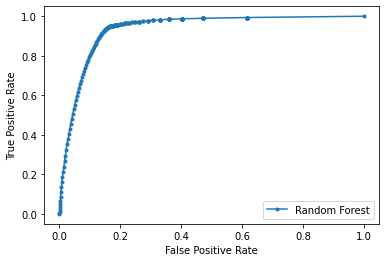

In [127]:
y_prob=rtmodel.predict_proba(X_test)
print(roc_auc_score(y_test,y_prob[: ][: , 1]))
dt1,dt2,_=roc_curve(y_test,y_prob[: ][: , 1])
plt.plot(dt1, dt2, marker='.', label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [86]:
def knn(train_data,test_data, n_neighbors=15):
    model = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
    scores = cross_val_score(model, train_data[0], train_data[1], cv=5)
    print("Train Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    model.fit(train_data[0], train_data[1])
    testscore = model.score(test_data[0], test_data[1])
    print("Test Accuracy: %0.2f " % (testscore))
    return model

In [88]:
knn = knn((X_train,y_train),(X_test,y_test))

Train Accuracy: 0.81 (+/- 0.00)
Test Accuracy: 0.82 


In [133]:
pickle.dump(knn, open('knn_model.sav', 'wb'))

0.8717437515272468


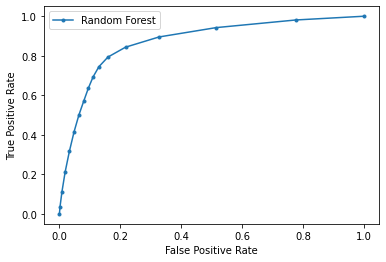

In [128]:
y_prob=knn.predict_proba(X_test)
print(roc_auc_score(y_test,y_prob[: ][: , 1]))
dt1,dt2,_=roc_curve(y_test,y_prob[: ][: , 1])
plt.plot(dt1, dt2, marker='.', label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
# adaboosting training time ~1h

In [89]:
def adaboosting(train_data,test_data,base_model=tree.DecisionTreeClassifier()):
    model = AdaBoostClassifier(base_model,
                             algorithm="SAMME",
                             n_estimators=200)
    scores = cross_val_score(model, train_data[0], train_data[1], cv=5)
    print("Train Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    model.fit(train_data[0], train_data[1])
    testscore = model.score(test_data[0], test_data[1])
    print("Test Accuracy: %0.2f " % (testscore))
    return model

In [91]:
adaboosting = adaboosting((X_train,y_train),(X_test,y_test))

Train Accuracy: 0.84 (+/- 0.01)
Test Accuracy: 0.84 


In [134]:
pickle.dump(adaboosting, open('adaboosting_model.sav', 'wb'))

0.8924746191948526


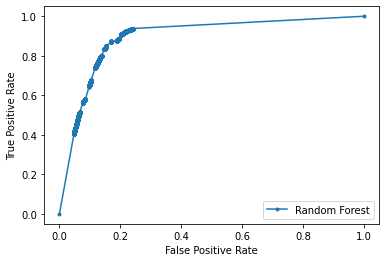

In [129]:

y_prob=adaboosting.predict_proba(X_test)
print(roc_auc_score(y_test,y_prob[: ][: , 1]))
dt1,dt2,_=roc_curve(y_test,y_prob[: ][: , 1])
plt.plot(dt1, dt2, marker='.', label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [92]:
def logisticClassifer(train_data,test_data):
    model =  linear_model.LogisticRegression()
    scores = cross_val_score(model, train_data[0], train_data[1], cv=5)
    print("Train Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    
    model.fit(train_data[0], train_data[1])
    testscore = model.score(test_data[0], test_data[1])
    print("Test Accuracy: %0.2f " % (testscore.mean()))
    return model

In [93]:
logistimodel = logisticClassifer((X_train,y_train),(X_test,y_test))

Train Accuracy: 0.76 (+/- 0.00)
Test Accuracy: 0.76 


In [135]:
pickle.dump(logistimodel, open('logistic_model.sav', 'wb'))

0.8169296803704778


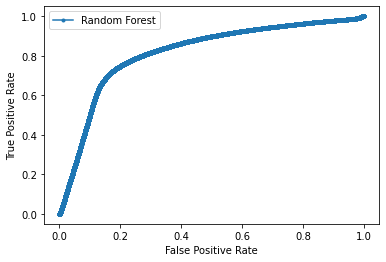

In [147]:
y_prob=logistimodel.predict_proba(X_test)
print(roc_auc_score(y_test,y_prob[: ][: , 1]))
dt1,dt2,_=roc_curve(y_test,y_prob[: ][: , 1])
plt.plot(dt1, dt2, marker='.', label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [144]:
clf =  MLPClassifier(hidden_layer_sizes=(1500,900), activation='logistic',max_iter=1,learning_rate='adaptive',warm_start=False,alpha=0.05,solver='adam')
clf.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.05, hidden_layer_sizes=(1500, 900),
              learning_rate='adaptive', max_iter=1)

In [145]:
pred=clf.predict(X_test)
print(classification_report(pred,y_test))
print(accuracy_score(pred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87    145883
           1       0.80      0.71      0.76     87070

    accuracy                           0.83    232953
   macro avg       0.82      0.80      0.81    232953
weighted avg       0.83      0.83      0.82    232953

0.8267719239503247


In [148]:
pickle.dump(clf, open('nn_model.sav', 'wb'))

0.9014595116339242


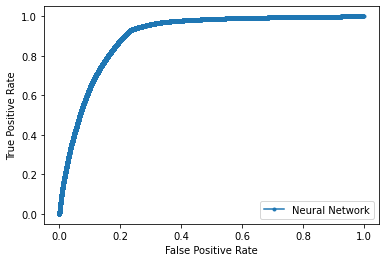

In [146]:
y_prob=clf.predict_proba(X_test)[:, 1]
print(roc_auc_score(y_test,y_prob))
dt1,dt2,_=roc_curve(y_test,y_prob)
plt.plot(dt1, dt2, marker='.', label='Neural Network')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()